In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Given functions
def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.random.rand(N)
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

### Problem 7

In [3]:
#Define the polynomial size
p = 2

#Get a value for a 
a = get_a(p)

#Generate training and test data
x_train, y_train = draw_sample(p,a,10)
x_test, y_test = draw_sample(p,a,1000)

In [4]:
#Define our least squares estimator function
def least_squares_estimator(X, y):
    """
    Inputs:
    X: (np.matrix of size N x (deg_true +1))
    y: (np.array) of size deg_true + 1 x 1
    
    Returns:
    b_hat: (np.array) of size N x (deg_true + 1)
    """
    #Make sure N > d
    if X.shape[0] < X.shape[1]:
        raise ValueError("You must have at least as many rows as columns!")
    else:
        #Compute the solution for b using the closed form linear algebra solution
        b_hat = np.linalg.inv(X.T@X) @ X.T @ y
        return b_hat

### Problem 8

In [5]:
def empirical_risk(X,y,b_hat):
    """
    Inputs:
    X: (np.matrix of size N x (deg_true +1))
    y: (np.array) of size deg_true + 1 x 1
    b_hat: (np.array) of size N x (deg_true + 1)
    Returns:
    emp_risk: (float) 
    """
    #Get # of observations
    N = X.shape[0]
    #Calculate Predictions
    y_hat = X @ b_hat
    #Calculate squared errors and then empirical risk
    sum_of_squared_errors = sum((y_hat-y)**2)
    emp_risk = sum_of_squared_errors / N 
    return emp_risk

### Problem 9

In [6]:
#Generate design matrices
X_train = get_design_mat(x_train, p)
X_test = get_design_mat(x_test, p)

In [7]:
#Calculate b_hat
b_hat = least_squares_estimator(X_train,y_train)

In [8]:
#Compare a and b_hat values
for i in range(len(b_hat)):
    print('Values at Index', i, 'For Vectors b_Hat and a',a[i],b_hat[i])
    print("Difference rounded to 5 decimal places:", np.round(a[i]-b_hat[i],5))

Values at Index 0 For Vectors b_Hat and a -3.0905428607319085 -3.090542860731878
Difference rounded to 5 decimal places: -0.0
Values at Index 1 For Vectors b_Hat and a -9.182713354674682 -9.182713354674672
Difference rounded to 5 decimal places: -0.0
Values at Index 2 For Vectors b_Hat and a -7.218279242053987 -7.218279242054127
Difference rounded to 5 decimal places: 0.0


In [9]:
#Use a helper function to make the graphing easier
def helper_func(x, degree):
    return np.array([x**i for i in range(degree+1)])

The function is well estimated, and therefore not visible on the graph as it is covered up by the original function g(x)


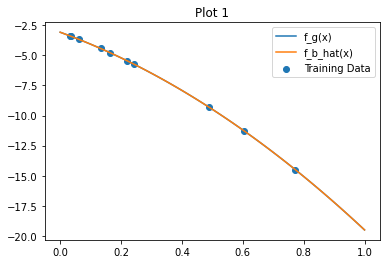

In [10]:
#Plot b_hat predictions vs A
x = np.linspace(0,1,100)
func_g = a@ helper_func(x,p)
b_hat_x = b_hat @ helper_func(x,p)
plt.scatter(x_train,y_train)

#B_hat predictions given
plt.plot(x, b_hat_x)
plt.plot(x, func_g)
plt.legend(labels=['f_g(x)','f_b_hat(x)','Training Data'])
plt.title("Plot 1")
print("The function is well estimated, and therefore not visible on the graph as it is covered up by the original function g(x)" )

### Problem 10

In [11]:
#Iterate through values 1-> 10, which will be 
#the degree of our polynomial used to predict y
for i in range(1,10):
    
    #Get new design matrices for polynomial i
    X_train = get_design_mat(x_train, i)
    X_test = get_design_mat(x_test, i)
    
    #Calculate best coefficient for each term
    new_b_hat = least_squares_estimator(X_train, y_train)
    
    #Calculate empirical risk for polynomial degree i
    #Use the test set that we generated
    current_risk = empirical_risk(X_test,y_test,new_b_hat)
    print("Empirical Risk for Polynomial Degree", i, "is:",current_risk)    

Empirical Risk for Polynomial Degree 1 is: 0.6570237830077272
Empirical Risk for Polynomial Degree 2 is: 1.758256967336831e-27
Empirical Risk for Polynomial Degree 3 is: 2.7217459324981327e-25
Empirical Risk for Polynomial Degree 4 is: 1.961869191571395e-21
Empirical Risk for Polynomial Degree 5 is: 6.1440443383347816e-18
Empirical Risk for Polynomial Degree 6 is: 2.0033143332573862e-14
Empirical Risk for Polynomial Degree 7 is: 1.5294227940319036e-08
Empirical Risk for Polynomial Degree 8 is: 0.0011344544034253472
Empirical Risk for Polynomial Degree 9 is: 40.06351010969907


### Problem 11

In [12]:
def noisy_emp_and_gen_risk(d,x_train,y_train, x_test,y_test):
    """
    Inputs:
    d: (int) degree of polynomial desired
    n: (int) number of samples to be generated in 
    
    Outputs:
    training_error: (float) average sum of squares of loss function on training data
    generalization_error: (float) average Sum of Squares of loss function on test data
    """
    #Generate design matrices
    X_train = get_design_mat(x_train, d)
    X_test = get_design_mat(x_test, d)
    #Calculate b_hat
    b_hat = least_squares_estimator(X_train, y_train)
    training_error = empirical_risk(X_train, y_train, b_hat)
    generalization_error = empirical_risk(X_test, y_test, b_hat)
    
    return training_error, generalization_error, b_hat

In [13]:
def poly_risk_gen(d,n, x_train, y_train, x_test,y_test):
    """
    Inputs:
    d: (int) desired degree of polynomial
    n: (int) number of rows TBD
    x_train: (np.array) training data x values
    y_train: (np.array) 
    x_test:
    y_test:
    
    Ouptut:
    train_error_arr: (np.array) e_t for various n
    test_error_arr: (np.array) e_g for various n
    """
    #Initiliaze np arrays
    train_error_arr = []
    test_error_arr = []
    
    #Iterate over N
    for i in range(d+1,len(n)):
        
        #Get relevant subset of data
        train_x_subset = x_train[:i+1]
        train_y_subset = y_train[:i+1]
        
        #Calculate e_t, e_g, and append to output
        training_error, generalization_error, b_hat = noisy_emp_and_gen_risk(d,train_x_subset, train_y_subset, x_test, y_test)
        train_error_arr.append(training_error)
        test_error_arr.append(generalization_error)
        
    return train_error_arr, test_error_arr, b_hat

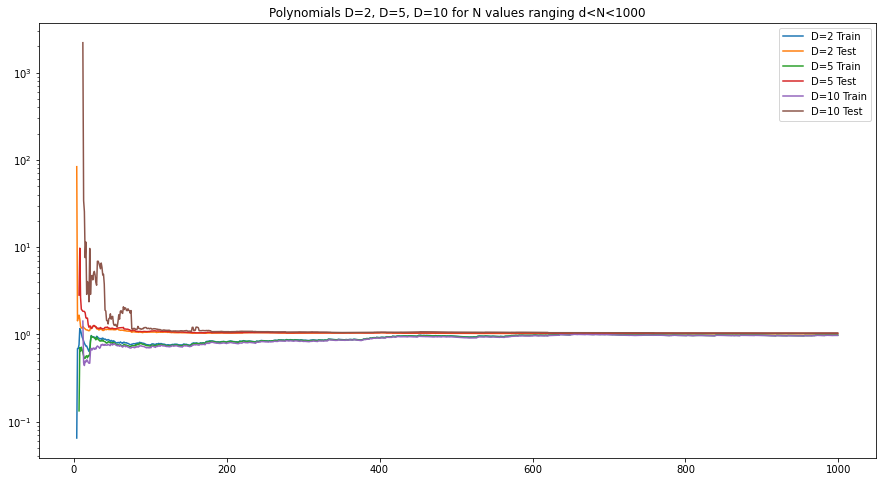

In [14]:
#Generate noisy data for polynomial of degree 5, with N = 1000 for train and test
d = 2
a = get_a(d)
x_train, y_train = draw_sample_with_noise(d,a,1000)
x_test, y_test = draw_sample_with_noise(d,a,1000)

#Generate a helper variable
n = list(range(1,1000))

#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat5 = poly_risk_gen(5,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat10 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)


#Plot 
plt.figure(figsize=(15,8))
plt.plot(n[3:], train_error_arr_2)
plt.plot(n[3:], test_error_arr_2)
plt.plot(n[6:], train_error_arr_5)
plt.plot(n[6:], test_error_arr_5)
plt.plot(n[11:], train_error_arr_10)
plt.plot(n[11:], test_error_arr_10)
plt.legend(labels=['D=2 Train','D=2 Test','D=5 Train', 'D=5 Test', 'D=10 Train','D=10 Test'])
plt.title("Polynomials D=2, D=5, D=10 for N values ranging d<N<1000")
plt.yscale('log')

Text(0.5, 1.0, 'Plot 2.1: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=200')

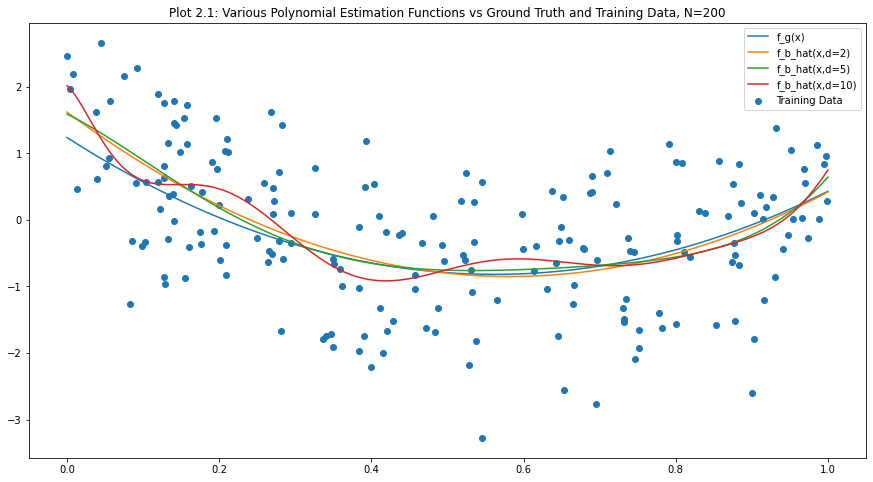

In [15]:
#Generate a helper variable
n = list(range(1,200))

#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2_200 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat_5_200 = poly_risk_gen(5,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat_10_200 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)
#Plot b_hat predictions vs A
x = np.linspace(0,1,1000)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_2_200 @ helper_func(x,2)
func_b_hat_5 = b_hat_5_200 @ helper_func(x,5)
func_b_hat_10 = b_hat_10_200 @ helper_func(x,10)

#B_hat predictions given
plt.figure(figsize=(15,8))
plt.scatter(x_train[:201],y_train[:201])
plt.plot(x, func_g)
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_5)
plt.plot(x, func_b_hat_10)

plt.legend(labels=['f_g(x)','f_b_hat(x,d=2)','f_b_hat(x,d=5)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 2.1: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=200")

Text(0.5, 1.0, 'Plot 2.2: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=600')

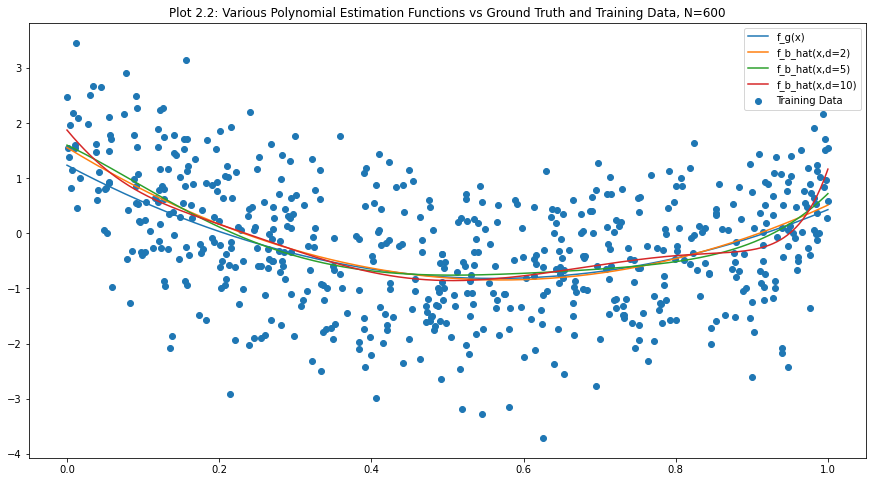

In [16]:
#Generate a helper variable
n = list(range(1,600))

#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2_600 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat_5_600 = poly_risk_gen(5,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat_10_600 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)
#Plot b_hat predictions vs A
x = np.linspace(0,1,1000)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_2_600 @ helper_func(x,2)
func_b_hat_5 = b_hat_5_600 @ helper_func(x,5)
func_b_hat_10 = b_hat_10_600 @ helper_func(x,10)

#B_hat predictions given
plt.figure(figsize=(15,8))
plt.scatter(x_train[:601],y_train[:601])
plt.plot(x, func_g)
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_5)
plt.plot(x, func_b_hat_10)

plt.legend(labels=['f_g(x)','f_b_hat(x,d=2)','f_b_hat(x,d=5)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 2.2: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=600")

Text(0.5, 1.0, 'Plot 2.2: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=1000')

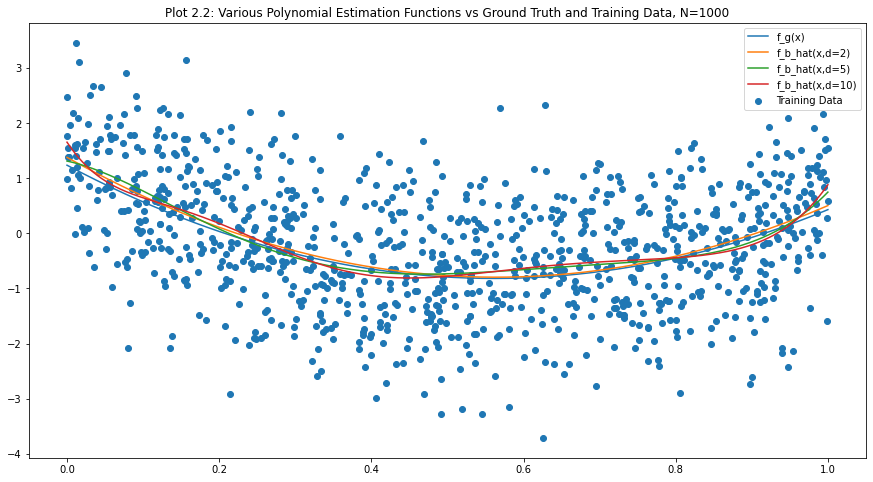

In [17]:
#Generate a helper variable
n = list(range(1,1001))

#Calculate e_g, e_t for various N's of polynomial degree 2
train_error_arr_2, test_error_arr_2, b_hat_2_1000 = poly_risk_gen(2,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 5
train_error_arr_5, test_error_arr_5, b_hat_5_1000 = poly_risk_gen(5,n,x_train, y_train, x_test,y_test)

#Calculate e_g, e_t for various N's of polynomial degree 10
train_error_arr_10, test_error_arr_10, b_hat_10_1000 = poly_risk_gen(10,n,x_train, y_train, x_test,y_test)
#Plot b_hat predictions vs A
x = np.linspace(0,1,1000)
func_g = a @ helper_func(x,p)
func_b_hat_2 = b_hat_2_1000 @ helper_func(x,2)
func_b_hat_5 = b_hat_5_1000 @ helper_func(x,5)
func_b_hat_10 = b_hat_10_1000 @ helper_func(x,10)

#B_hat predictions given N data points
plt.figure(figsize=(15,8))
plt.scatter(x_train[:1001],y_train[:1001])
plt.plot(x, func_g)
plt.plot(x, func_b_hat_2)
plt.plot(x, func_b_hat_5)
plt.plot(x, func_b_hat_10)

plt.legend(labels=['f_g(x)','f_b_hat(x,d=2)','f_b_hat(x,d=5)','f_b_hat(x,d=10)','Training Data'])
plt.title("Plot 2.2: Various Polynomial Estimation Functions vs Ground Truth and Training Data, N=1000")

### Question 12

**Approximation Error** = $R(f_F) - R(f^*)$
**Estimation Error** = $R(\hat{f}) - R(f_F)$ $\newline$ 
Excess Risk, and thus estimation error, approaches $0$ as $N$ becomes large. Specifically, estimation error decreases to 0 due to the law of large numbers, optimization error is already 0 as we are using the closed form solution of Least Squares Estimation rather than gradient descent, and approximation error also converges to 0 as our polynomials fit better and better to the ground truth polynomial, while simoltanuesly not being able to fit the random noise with variance 1. As the higher dimension polynomials are fit with larger $N$ observations of training data, the weights on the larger coefficients approach $0$, while the weights of the first three coefficients ($a_0, a_1, a_2$) approach the ground truth function weights given in $a$. $\newline$

Therefore, the only error that remains is Bayes risk. Since our Bayes predictor, $f^*$, is a polynomial function of degree $2$ with some noise added, is outside our hypothesis space. Bayes risk is equal to $1$, which makes perfect sense as our noise term is a random variable that is $0$ mean and has variance $1$ and our loss function is defined as the sum of squared errors.

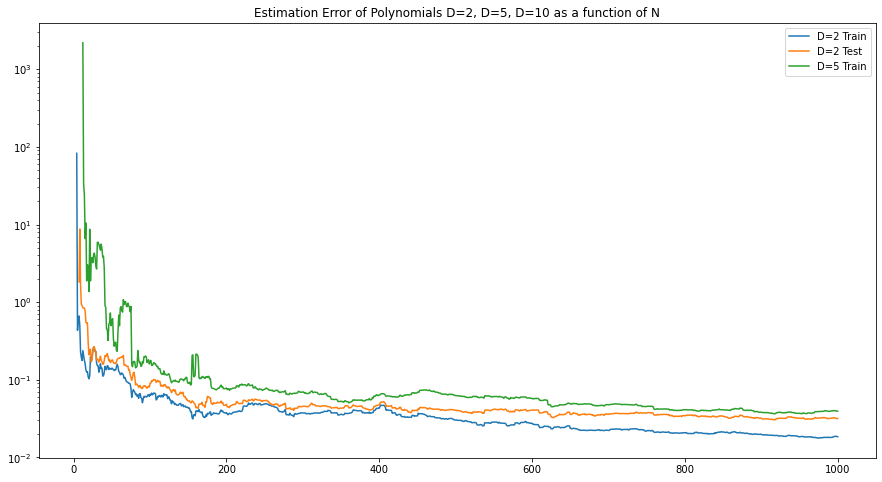

In [24]:
test_error_arr_2 = np.array(test_error_arr_2)
test_error_arr_5 = np.array(test_error_arr_5)
test_error_arr_10 = np.array(test_error_arr_10)

#Plot 
plt.figure(figsize=(15,8))
plt.plot(n[3:], test_error_arr_2-1)
plt.plot(n[6:], test_error_arr_5-1)
plt.plot(n[11:], test_error_arr_10-1)
plt.legend(labels=['D=2 Train','D=2 Test','D=5 Train', 'D=5 Test', 'D=10 Train','D=10 Test'])
plt.title("Estimation Error of Polynomials D=2, D=5, D=10 as a function of N")
plt.yscale('log')